## Linear Regression

Author :Nutan Mandale

Mentor: Vincent Ramdhanie

In [1]:
#importing libraries
%matplotlib inline
from IPython.display import display
import numpy as np
import pandas as pd
import scipy
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# import data
data = pd.read_excel("./table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls")

In [3]:
data.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0


### Data Cleaning

In [4]:
data.drop(data.index[0:4], inplace=True)
data.drop(data.index[-3:], inplace=True)

In [5]:
data = data.rename(columns = {'Table 8':'City','Unnamed: 1':'Population','Unnamed: 2':'Violentcrime','Unnamed: 3':'Murder','Unnamed: 4':'Rape1','Unnamed: 5':'Rape','Unnamed: 6':'Robbery','Unnamed: 7':'Aggravatedassault','Unnamed: 8':'Propertycrime','Unnamed: 9':'Burglary','Unnamed: 10':'Larcenythef','Unnamed: 11':'Motorvehicletheft','Unnamed: 12':'Arson3'})

In [6]:
data['Robbery_F'] = data['Robbery'].map(lambda x: 1 if x > 0 else 0)
data['Murder_F'] = data['Murder'].map(lambda x: 1 if x > 0 else 0)
data['Burglary_F'] = data['Burglary'].map(lambda x: 1 if x > 0 else 0)
data['Larcenythef_F'] = data['Larcenythef'].map(lambda x: 1 if x > 0 else 0)
data['Motorvehicletheft_F'] = data['Motorvehicletheft'].map(lambda x: 1 if x > 0 else 0)
data['pop_square'] = data['Population'].map(lambda x: x*x)

In [37]:
data.head(2)

,City,Population,Violentcrime,Murder,Rape1,Rape,Robbery,Aggravatedassault,Propertycrime,Burglary,Larcenythef,Motorvehicletheft,Arson3,Robbery_F,Murder_F,Burglary_F,Larcenythef_F,Motorvehicletheft_F,pop_square
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0,0,0,1,1,0,3463321
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0,0,0,1,1,1,6640929


In [38]:
data.dropna()

,City,Population,Violentcrime,Murder,Rape1,Rape,Robbery,Aggravatedassault,Propertycrime,Burglary,Larcenythef,Motorvehicletheft,Arson3,Robbery_F,Murder_F,Burglary_F,Larcenythef_F,Motorvehicletheft_F,pop_square


In [39]:
data.shape

(348, 19)

### Multivariable_regression

Preparing the data with multivariable regression



$Propertycrime = α + Population + Population^2 + Murder +Robbery$

### Preparing Model

In [40]:
X = data[['Population', 'pop_square','Murder_F', 'Robbery_F','Burglary_F','Larcenythef_F','Motorvehicletheft_F']]
y = data[['Propertycrime']]
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))
X.head()

(348, 7)
(348, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,Population,pop_square,Murder_F,Robbery_F,Burglary_F,Larcenythef_F,Motorvehicletheft_F
4,1861,3463321,0,0,1,1,0
5,2577,6640929,0,0,1,1,1
6,2846,8099716,0,0,1,1,0
7,97956,9595377936,1,1,1,1,1
8,6388,40806544,0,1,1,1,1


In [41]:
X.tail()

,Population,pop_square,Murder_F,Robbery_F,Burglary_F,Larcenythef_F,Motorvehicletheft_F
347,10685,114169225,0,1,1,1,1
348,829,687241,0,0,1,1,0
349,5931,35176761,0,0,1,1,0
350,199134,39654349956,1,1,1,1,1
351,36643,1342709449,0,1,1,1,1


In [42]:
y.shape

(348, 1)

In [43]:
X.shape

(348, 7)

Let us instantiate the mode and find the coefficients ,intercept and R-square

Coefficients: 
 [[  3.48246160e-02  -2.13091068e-09   1.96889509e+01  -6.14548590e+01
   -4.79316646e+01   8.72386431e+00  -8.08197985e+01]]
Intercept: 
 [-38.08386837]
R-score: 
 0.996146288801


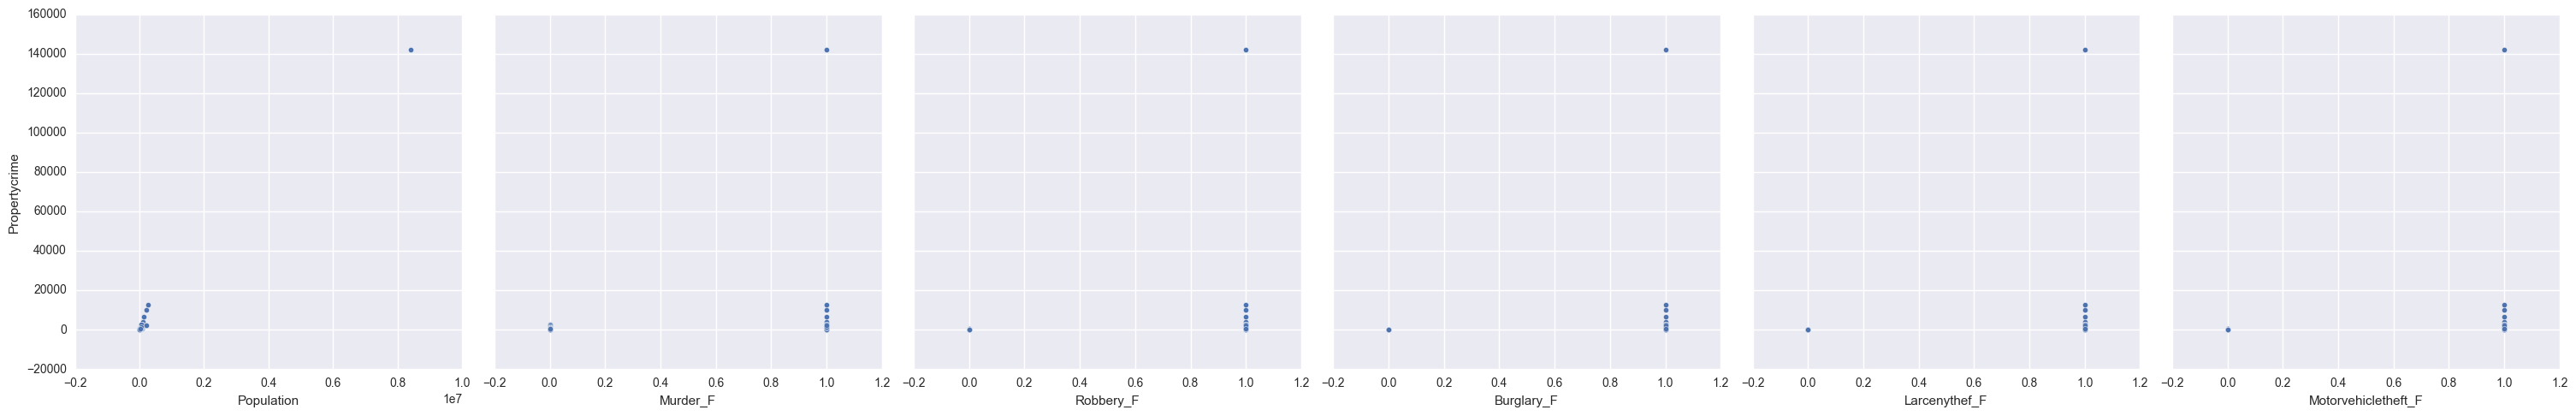

In [44]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('R-score: \n',regr.score(X, y))

# Plot outputs
sns.pairplot(
    data[['Population', 'Murder_F', 'Robbery_F', 'Propertycrime','Burglary_F','Larcenythef_F','Motorvehicletheft_F']],
    x_vars=['Population', 'Murder_F', 'Robbery_F','Burglary_F','Larcenythef_F','Motorvehicletheft_F'], 
    y_vars=['Propertycrime'],
kind='scatter',
size=5);

The R-squared value appears too good to be true.

Let us find the residual value.

C:\Users\NutanMandale\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


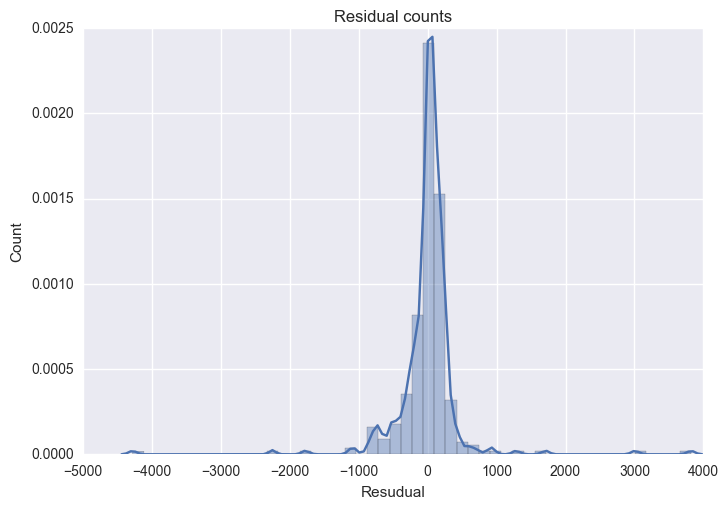

In [45]:
actual = data['Propertycrime']
predicted = regr.predict(X).ravel()

residual = actual - predicted
sns.distplot(residual);
plt.title('Residual counts')
plt.xlabel('Resudual')
plt.ylabel('Count');

The plot is not normal. 

### Homoscedasticity

The distribution of your error terms (its "scedasticity"), should be consistent for all predicted values, or homoscedastic.
For example, if your error terms aren't consistently distributed and you have more variance in the error for large outcome values than for small ones, then the confidence interval for large predicted values will be too small because it will be based on the average error variance. This leads to overconfidence in the accuracy of your model's predictions.

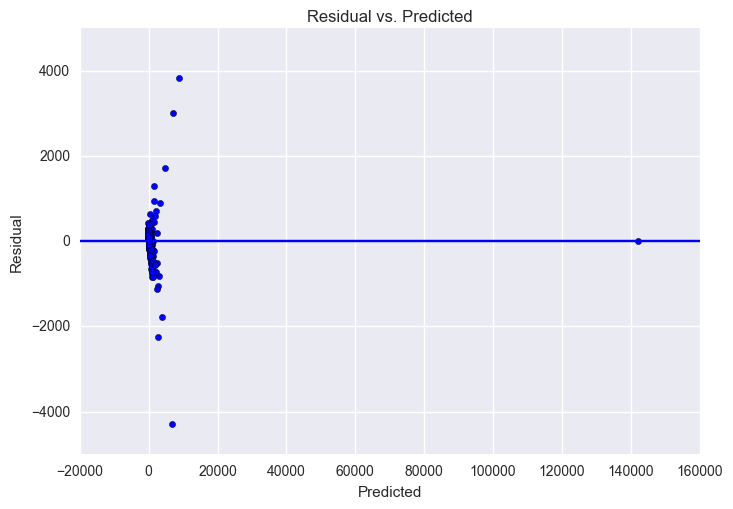

In [46]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [47]:
correlation_matrix = X.corr()
display(correlation_matrix)

,pop_square,Murder_F,Robbery_F,Burglary_F,Larcenythef_F,Motorvehicletheft_F
pop_square,1.000000,0.133067,0.043983,0.013670,0.007729,0.032573
Murder_F,0.133067,1.000000,0.313271,0.102588,0.058001,0.225805
Robbery_F,0.043983,0.313271,1.000000,0.286105,0.175686,0.448838
Burglary_F,0.013670,0.102588,0.286105,1.000000,0.479420,0.337818
Larcenythef_F,0.007729,0.058001,0.175686,0.479420,1.000000,0.237247
Motorvehicletheft_F,0.032573,0.225805,0.448838,0.337818,0.237247,1.000000


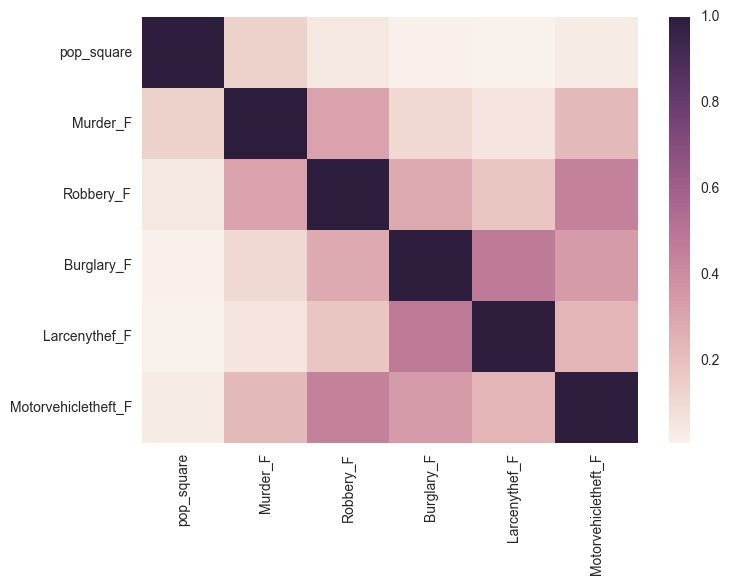

In [48]:
sns.heatmap(X.corr())

In [49]:
data_new = data[['City','Population', 'Murder_F', 'Robbery_F', 'Propertycrime','Burglary_F','Larcenythef_F','Motorvehicletheft_F']]

In [50]:
data_new.columns

Index(['City', 'Population', 'Murder_F', 'Robbery_F', 'Propertycrime',
       'Burglary_F', 'Larcenythef_F', 'Motorvehicletheft_F'],
      dtype='object')

In [51]:
data_new.shape

(348, 8)

In [52]:
def data_info(dataframe):
    
    columns = dataframe.columns.values.tolist()
    
    for elem in columns:
        print('\ncolumn %s has %d empty rows'% (elem, sum(dataframe[elem].isnull())))
        print('column %s statistics\n%s\n'% (elem, dataframe[elem].describe()))

In [53]:
data_info(data_new)


column City has 0 empty rows
column City statistics
count                348
unique               348
top       Riverhead Town
freq                   1
Name: City, dtype: object


column Population has 0 empty rows
column Population statistics
count      348
unique     347
top       9517
freq         2
Name: Population, dtype: int64


column Murder_F has 0 empty rows
column Murder_F statistics
count    348.000000
mean       0.140805
std        0.348321
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Murder_F, dtype: float64


column Robbery_F has 0 empty rows
column Robbery_F statistics
count    348.000000
mean       0.600575
std        0.490486
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Robbery_F, dtype: float64


column Propertycrime has 0 empty rows
column Propertycrime statistics
count     348
unique    239
top         0
freq        6
Name: Propertycrime, dtype:

In [54]:
#Converting dtype integer to float
data_new['Population'] = data_new.Population.astype(float)
data_new['Propertycrime'] = data_new.Propertycrime.astype(float)

C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [55]:
data_new.dtypes

City                    object
Population             float64
Murder_F                 int64
Robbery_F                int64
Propertycrime          float64
Burglary_F               int64
Larcenythef_F            int64
Motorvehicletheft_F      int64
dtype: object

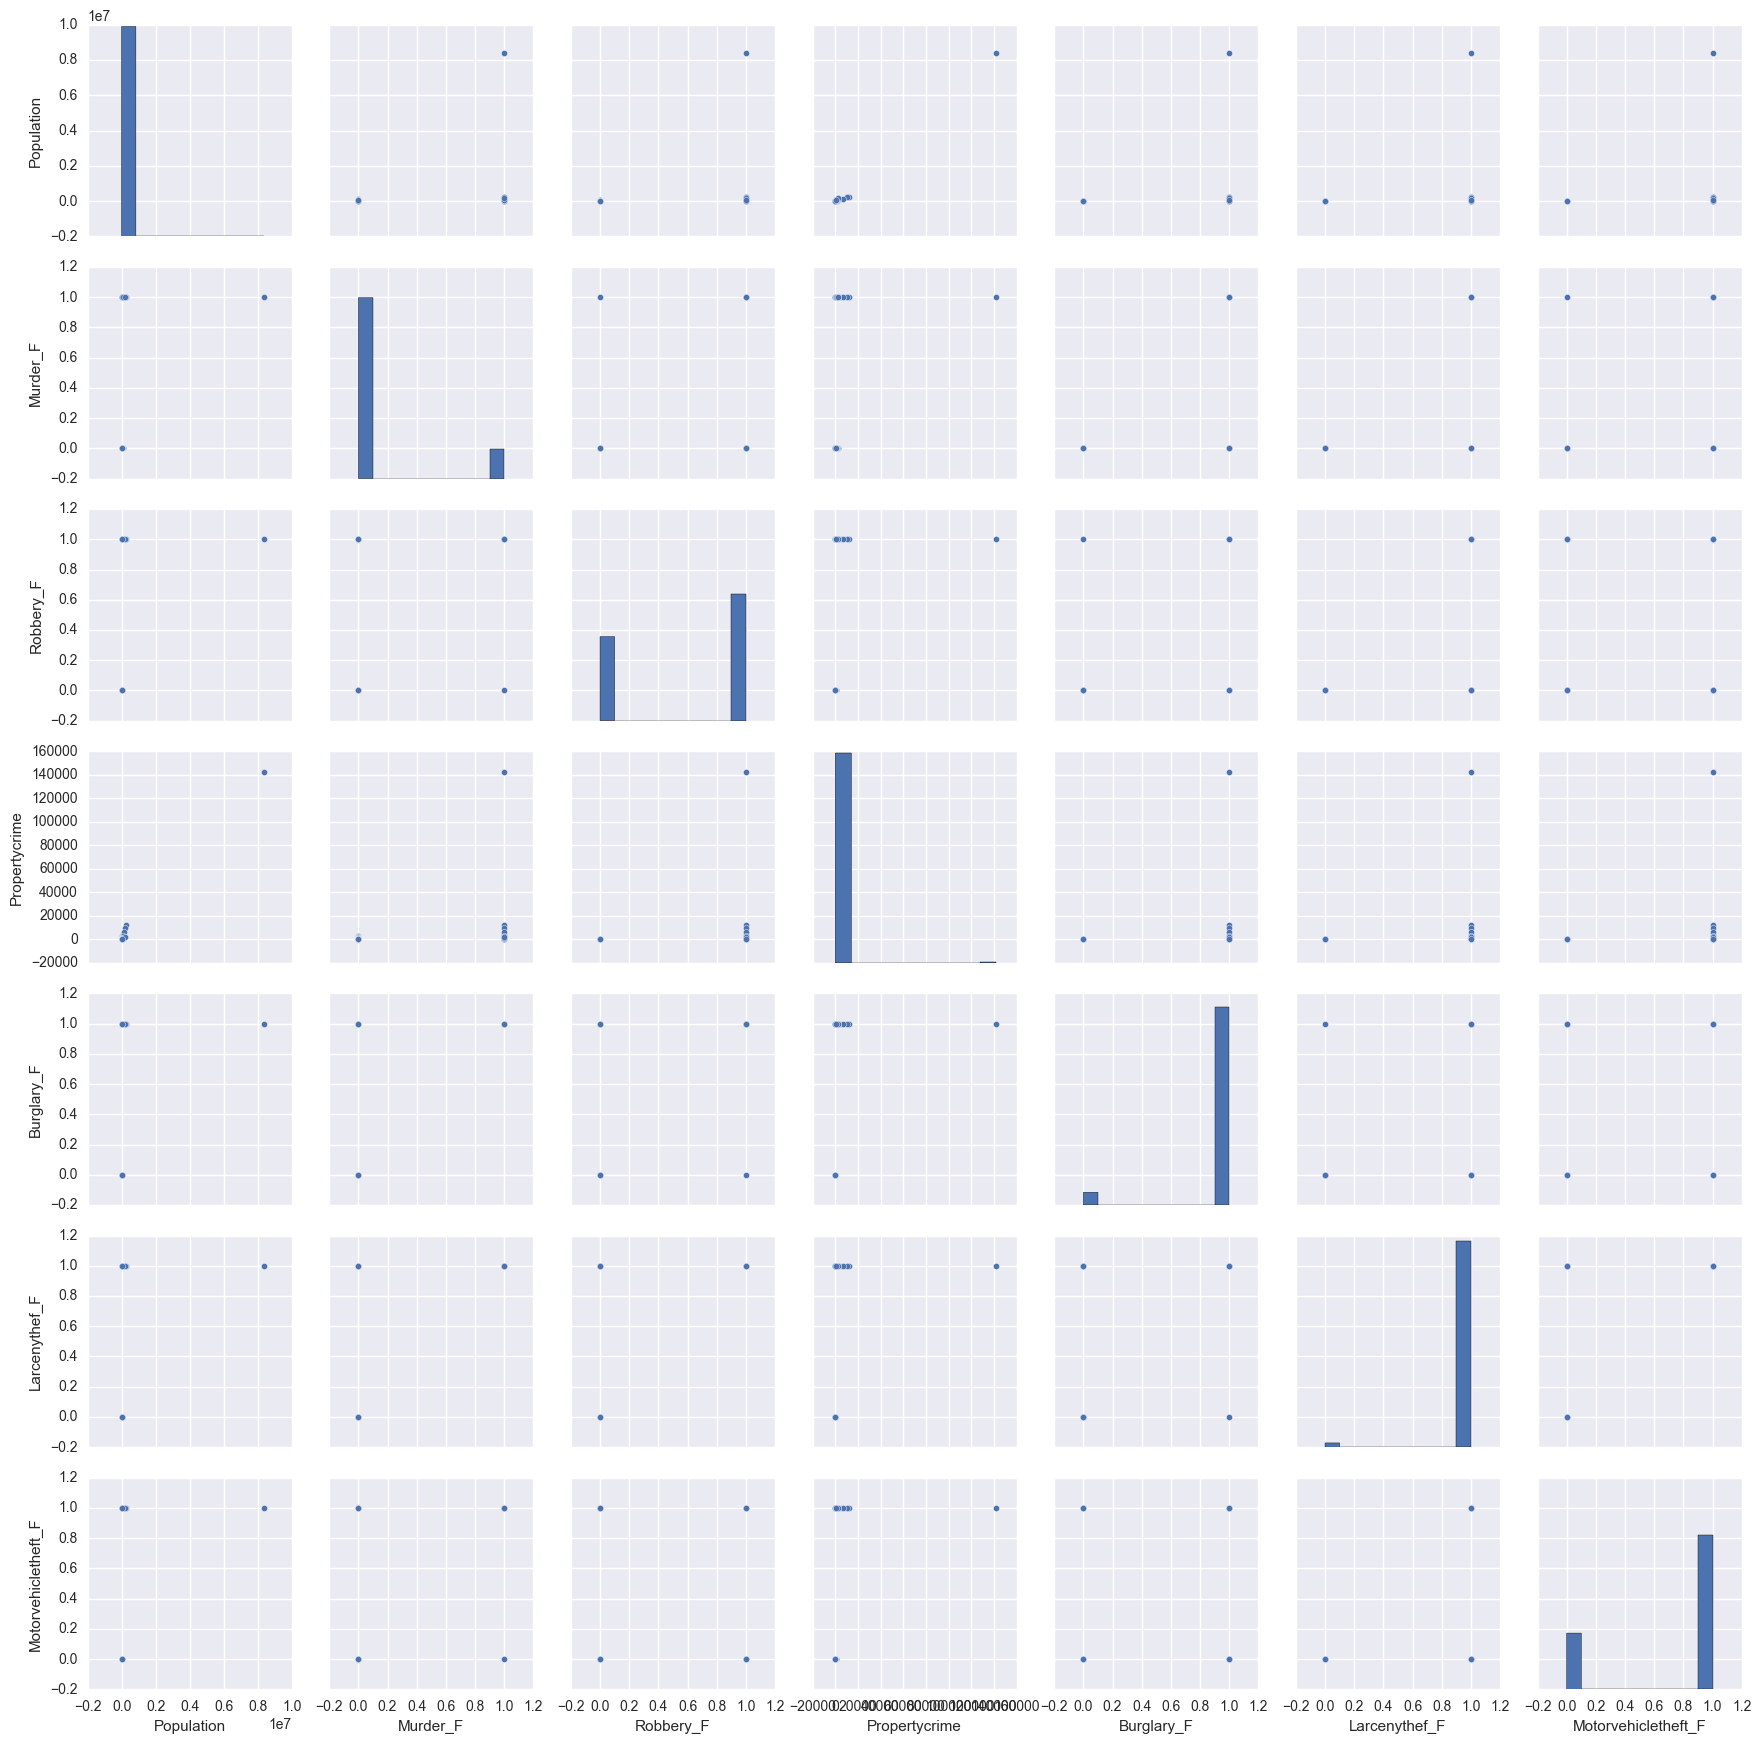

In [59]:
_ = sns.pairplot(data_new)

In [56]:
data_new.nlargest(5, 'Population')

,City,Population,Murder_F,Robbery_F,Propertycrime,Burglary_F,Larcenythef_F,Motorvehicletheft_F
220,New York,8396126.0,1,1,141971.0,1,1,1
39,Buffalo,258789.0,1,1,12491.0,1,1,1
276,Rochester,210562.0,1,1,10051.0,1,1,1
350,Yonkers,199134.0,1,1,2368.0,1,1,1
314,Syracuse,143834.0,1,1,6473.0,1,1,1


In [58]:
data_new.nlargest(5, 'Propertycrime')

,City,Population,Murder_F,Robbery_F,Propertycrime,Burglary_F,Larcenythef_F,Motorvehicletheft_F
220,New York,8396126.0,1,1,141971.0,1,1,1
39,Buffalo,258789.0,1,1,12491.0,1,1,1
276,Rochester,210562.0,1,1,10051.0,1,1,1
314,Syracuse,143834.0,1,1,6473.0,1,1,1
7,Albany,97956.0,1,1,4090.0,1,1,1


We can see 4 of the cities that have maximum population also show maximum property crime. So let us remove those cities from our dataframe and see the results

In [60]:
data_new = data_new[data_new.City != "New York"]
data_new = data_new[data_new.City != "Buffalo"]
data_new = data_new[data_new.City != "Rochester"]
data_new = data_new[data_new.City != "Syracuse"]

In [62]:
data_new.shape

(344, 8)

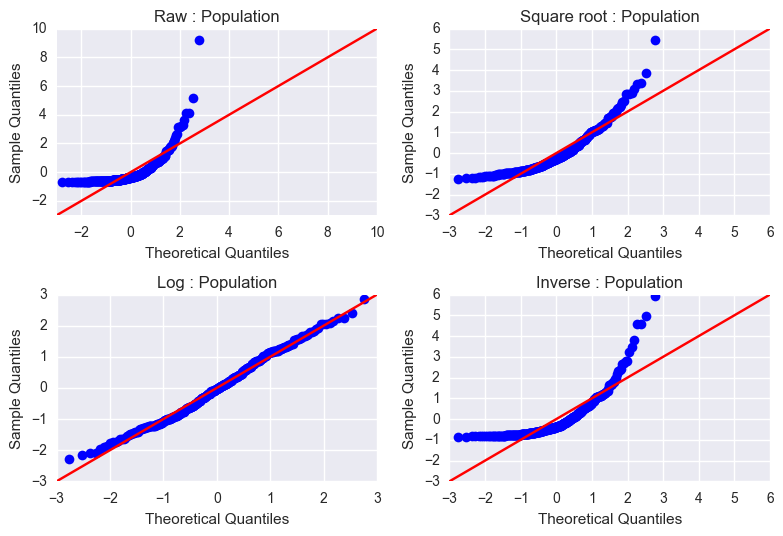

In [63]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(data_new.Population, line='45', fit=True, ax=ax)
ax.set_title('Raw : Population')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(data_new.Population), line='45', fit=True, ax=ax)
ax.set_title('Square root : Population')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(np.log(data_new.Population), line='45', fit=True, ax=ax)
ax.set_title('Log : Population')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(1/data_new.Population, line='45', fit=True, ax=ax)
ax.set_title('Inverse : Population')
plt.tight_layout();

Now let us see this for the other features

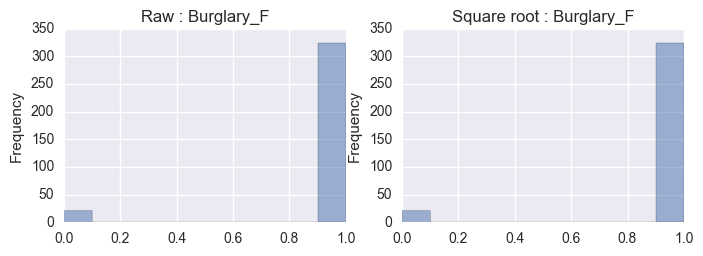

In [64]:
# Burglary
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)

data_new['Burglary_F'].plot.hist(alpha=0.5)
ax.set_title('Raw : Burglary_F')

ax = fig.add_subplot(2, 2, 2)

ax.set_title('Square root : Burglary_F')
np.sqrt(data_new['Burglary_F']).plot.hist(alpha=0.5);

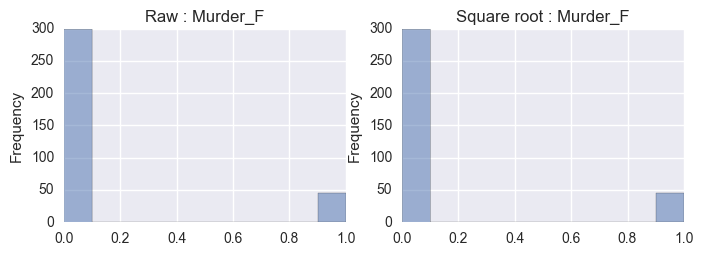

In [65]:
# Murder
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
#sm.graphics.qqplot(data_new.Murder_F, line='45', fit=True, ax=ax)
data_new['Murder_F'].plot.hist(alpha=0.5)
ax.set_title('Raw : Murder_F')

ax = fig.add_subplot(2, 2, 2)
#sm.graphics.qqplot(np.sqrt(data_new.Murder_F), line='45', fit=True, ax=ax)
ax.set_title('Square root : Murder_F')
np.sqrt(data_new['Murder_F']).plot.hist(alpha=0.5);

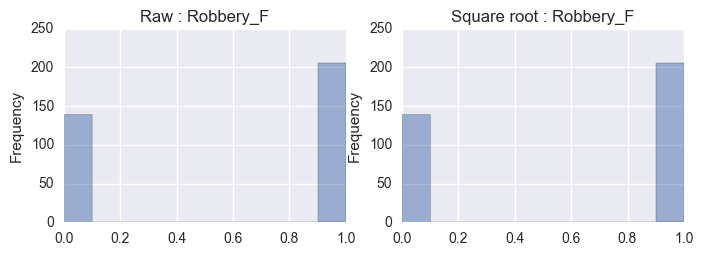

In [66]:
# Robbery
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
#sm.graphics.qqplot(data_new.Murder_F, line='45', fit=True, ax=ax)
data_new['Robbery_F'].plot.hist(alpha=0.5)
ax.set_title('Raw : Robbery_F')

ax = fig.add_subplot(2, 2, 2)
#sm.graphics.qqplot(np.sqrt(data_new.Murder_F), line='45', fit=True, ax=ax)
ax.set_title('Square root : Robbery_F')
np.sqrt(data_new['Robbery_F']).plot.hist(alpha=0.5);

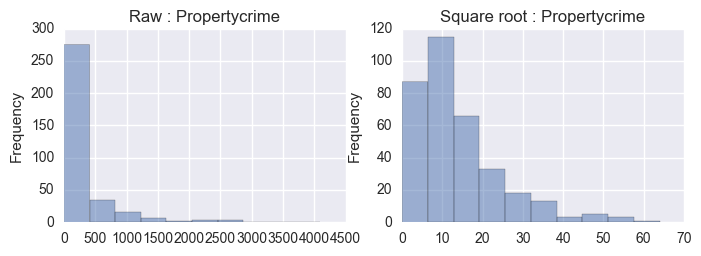

In [67]:
# Property crime
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
#sm.graphics.qqplot(data_new.Murder_F, line='45', fit=True, ax=ax)
data_new['Propertycrime'].plot.hist(alpha=0.5)
ax.set_title('Raw : Propertycrime')

ax = fig.add_subplot(2, 2, 2)
#sm.graphics.qqplot(np.sqrt(data_new.Murder_F), line='45', fit=True, ax=ax)
ax.set_title('Square root : Propertycrime')
np.sqrt(data_new['Propertycrime']).plot.hist(alpha=0.5);

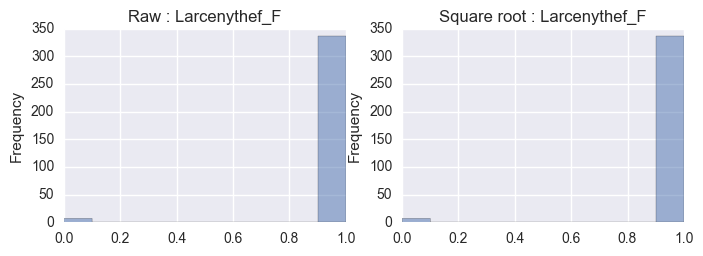

In [68]:
# Larcenythef
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)

data_new['Larcenythef_F'].plot.hist(alpha=0.5)
ax.set_title('Raw : Larcenythef_F')

ax = fig.add_subplot(2, 2, 2)

ax.set_title('Square root : Larcenythef_F')
np.sqrt(data_new['Larcenythef_F']).plot.hist(alpha=0.5);

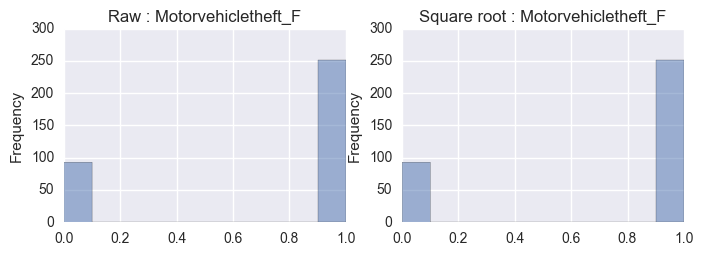

In [69]:
# Motorvehicletheft
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)

data_new['Motorvehicletheft_F'].plot.hist(alpha=0.5)
ax.set_title('Raw : Motorvehicletheft_F')

ax = fig.add_subplot(2, 2, 2)

ax.set_title('Square root : Motorvehicletheft_F')
np.sqrt(data_new['Motorvehicletheft_F']).plot.hist(alpha=0.5);

In [70]:
# Adding the log of the raw Population data points into data frame.
data_new['Population_l'] = np.log(data_new.Population)
data_new['Burglary_sqrt'] = np.sqrt(data_new.Burglary_F)
data_new['Murder_sqrt'] = np.sqrt(data_new.Murder_F)
data_new['Robbery_sqrt'] = np.sqrt(data_new.Robbery_F)
data_new['Propertycrime_sqrt'] = np.sqrt(data_new.Propertycrime)
data_new['Larcenythef_sqrt'] = np.sqrt(data_new.Larcenythef_F)
data_new['Motorvehicletheft_sqrt'] = np.sqrt(data_new.Motorvehicletheft_F)

In [71]:
data_new.columns

Index(['City', 'Population', 'Murder_F', 'Robbery_F', 'Propertycrime',
       'Burglary_F', 'Larcenythef_F', 'Motorvehicletheft_F', 'Population_l',
       'Burglary_sqrt', 'Murder_sqrt', 'Robbery_sqrt', 'Propertycrime_sqrt',
       'Larcenythef_sqrt', 'Motorvehicletheft_sqrt'],
      dtype='object')

In [72]:
trans_data = data_new[['City',
                       'Population_l',
                       'Burglary_sqrt',
                       'Murder_sqrt',
                       'Robbery_sqrt', 
                       'Propertycrime_sqrt',
                       'Larcenythef_sqrt', 
                       'Motorvehicletheft_sqrt']]

In [73]:
trans_data.head(2)

,City,Population_l,Burglary_sqrt,Murder_sqrt,Robbery_sqrt,Propertycrime_sqrt,Larcenythef_sqrt,Motorvehicletheft_sqrt
4,Adams Village,7.528869,1.0,0.0,0.0,3.464102,1.0,0.0
5,Addison Town and Village,7.854381,1.0,0.0,0.0,4.898979,1.0,1.0


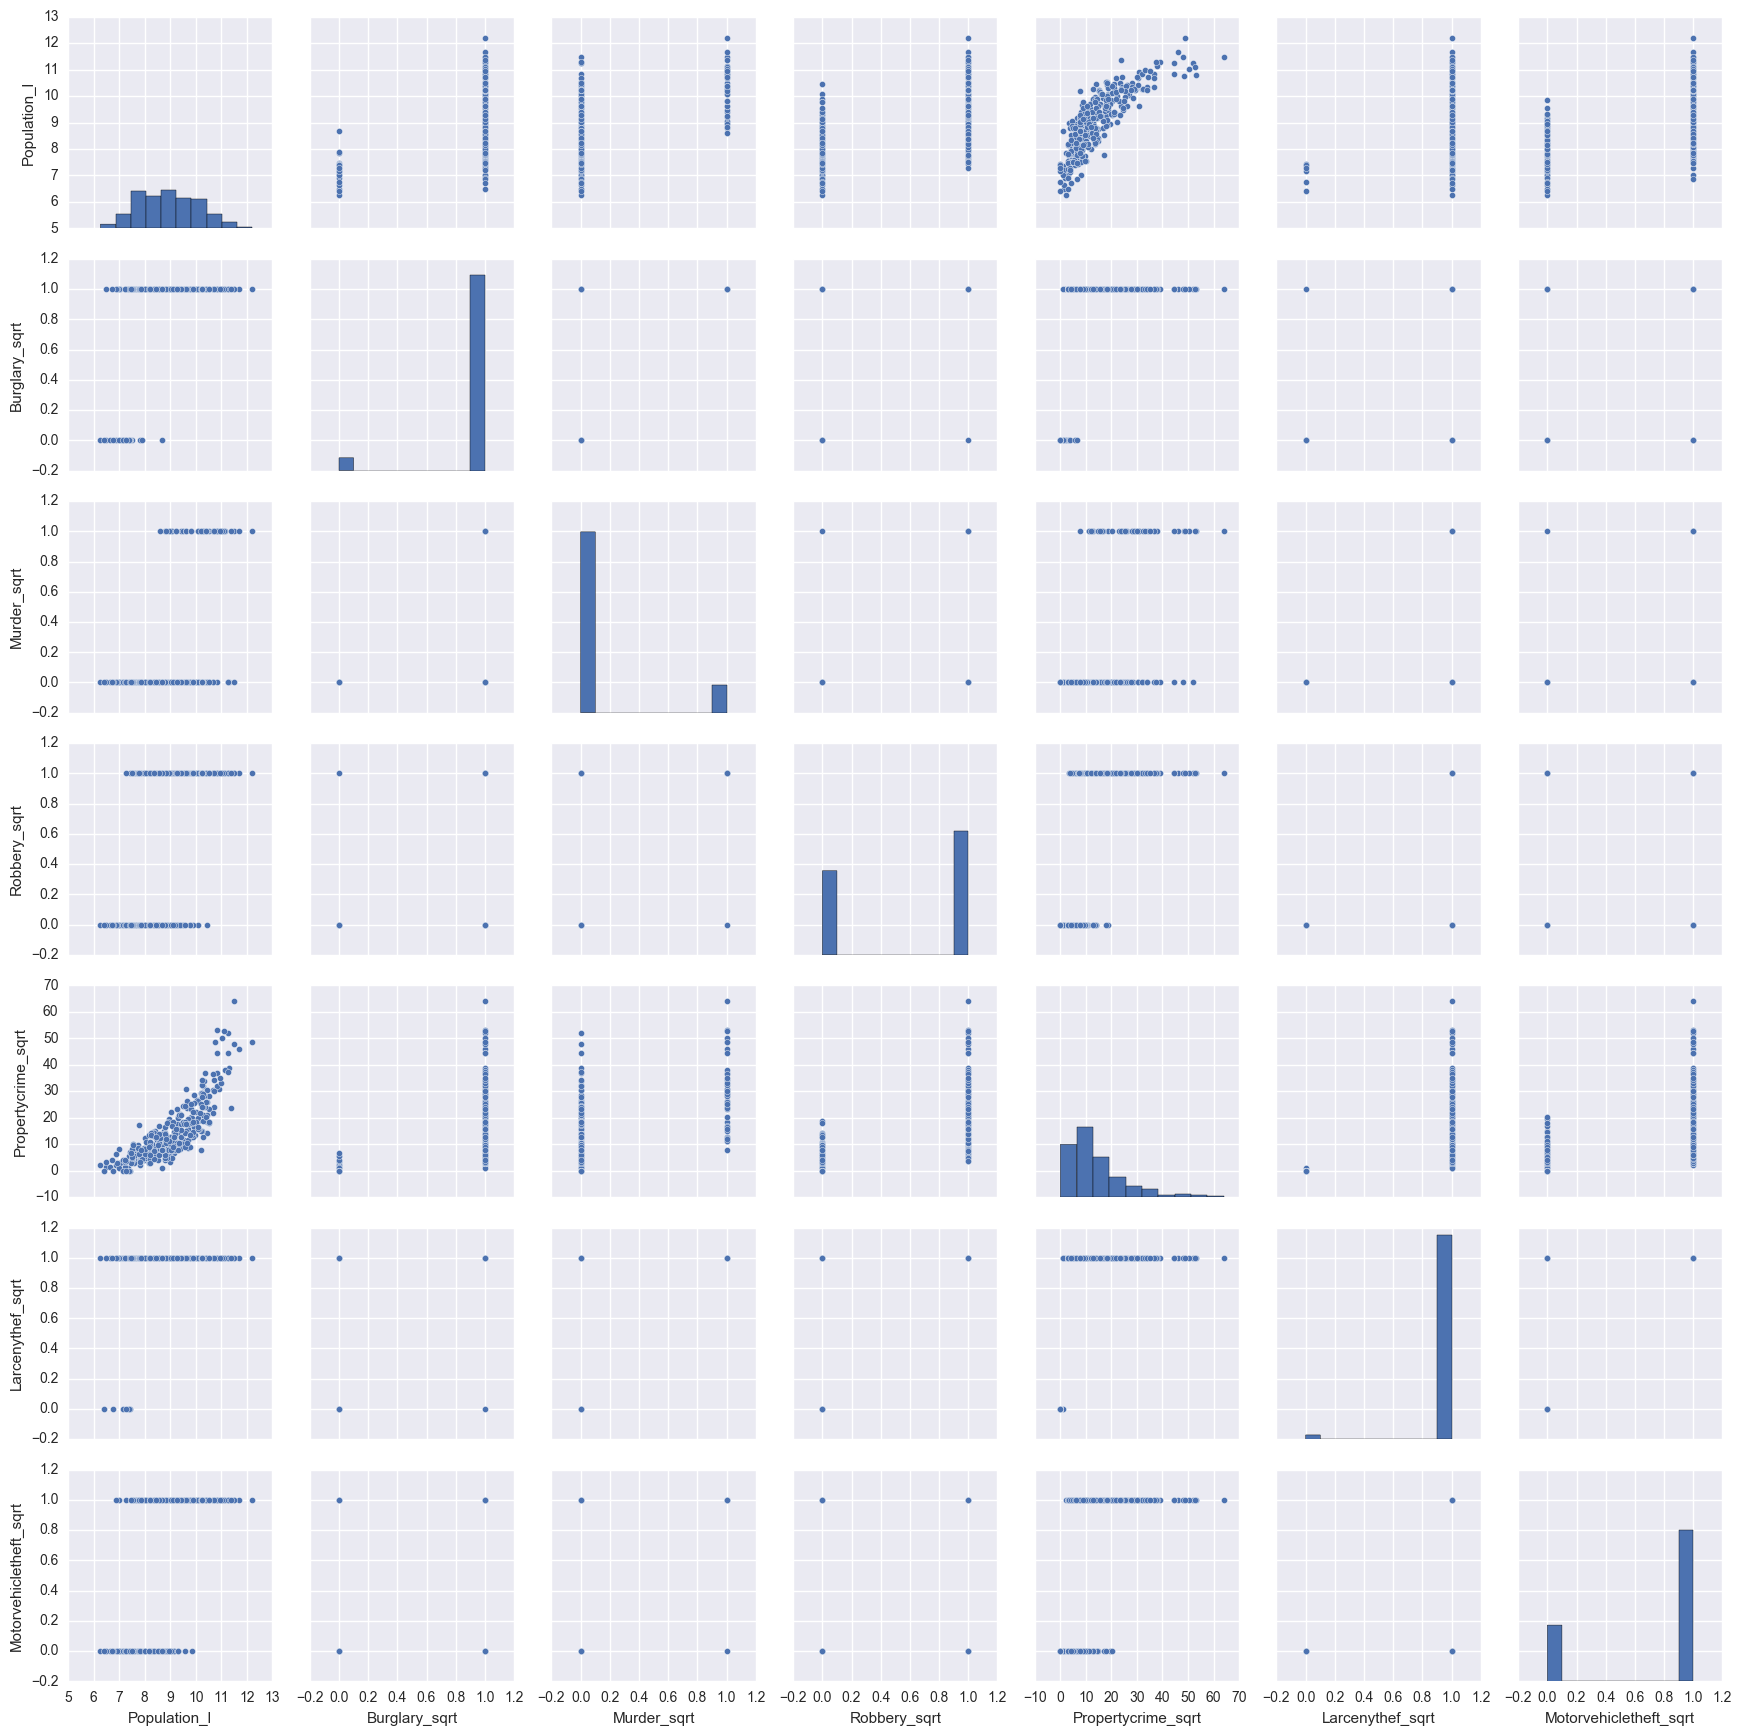

In [74]:
_ = sns.pairplot(trans_data)

In [75]:
X = trans_data[['Population_l','Burglary_sqrt','Murder_sqrt','Robbery_sqrt','Larcenythef_sqrt','Motorvehicletheft_sqrt']]
y = trans_data[['Propertycrime_sqrt']].values.reshape(-1, 1)
regr.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, y))



Coefficients: 
 [[ 6.35084575 -2.1965572   5.83569196  2.82326152  1.31439668  0.28205778]]

Intercept: 
 [-44.70992902]

R-squared:
0.731662452766


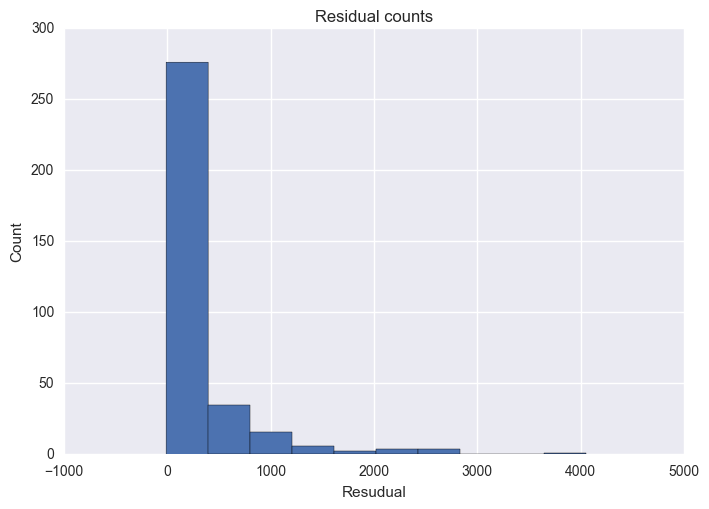

In [76]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data_new['Propertycrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Resudual')
plt.ylabel('Count')
plt.show()

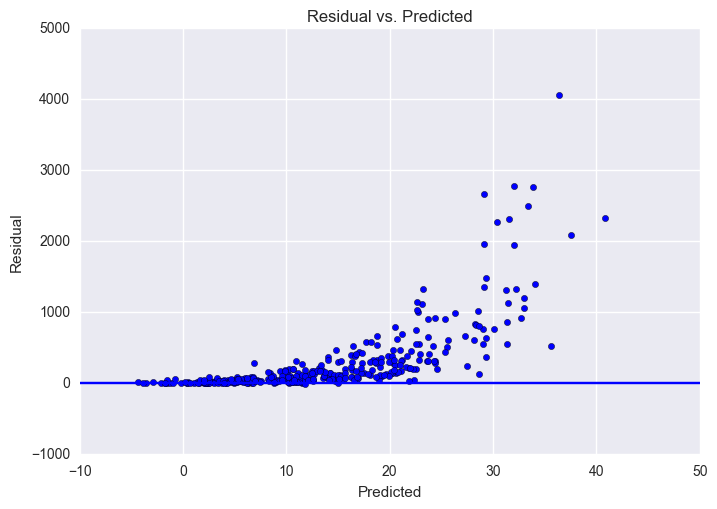

In [77]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

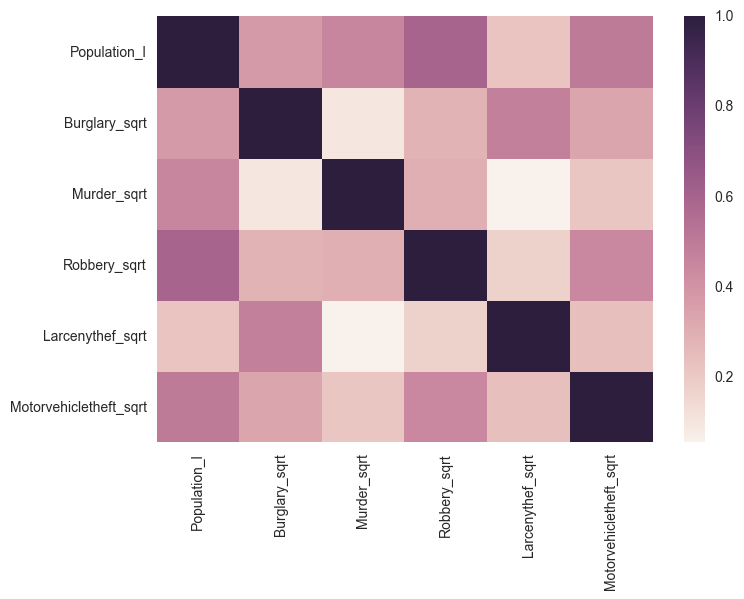

In [78]:
sns.heatmap(X.corr())